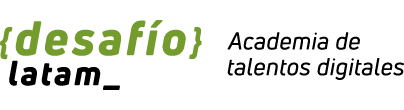

 # <font color='green'>Probabilidades con Python</font>

Vamos a mostrar las principales herramientas para calcular probabilidades con Python, a partir de las herramientas que ya conocemos para DataFrames y algunso datos. Para esto, cargaremos un DataFrame con datos relacionados con la salud mental de un conjunto de estudiantes.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('salud_mental.csv',delimiter=',')
df

Timestamp Choose your gender   Age What is your course?   
0         8/7/2020 12:02             Female  18.0          Engineering  \
1         8/7/2020 12:04               Male  21.0    Islamic education   
2         8/7/2020 12:05               Male  19.0                  BIT   
3         8/7/2020 12:06             Female  22.0                 Laws   
4         8/7/2020 12:13               Male  23.0         Mathemathics   
..                   ...                ...   ...                  ...   
96   13/07/2020 19:56:49             Female  21.0                  BCS   
97   13/07/2020 21:21:42               Male  18.0          Engineering   
98   13/07/2020 21:22:56             Female  19.0             Nursing    
99   13/07/2020 21:23:57             Female  23.0     Pendidikan Islam   
100  18/07/2020 20:16:21               Male  20.0   Biomedical science   

    Your current year of Study What is your CGPA? Marital status   
0                       year 1        3.00 - 3.49             No  \
1                       year 2        3.00 - 3.49             No   
2                       Year 1        3.00 - 3.49             No   
3                       year 3        3.00 - 3.49            Yes   
4                       year 4        3.00 - 3.49             No   
..                         ...                ...            ...   
96                      year 1        3.50 - 4.00             No   
97                      Year 2        3.00 - 3.49             No   
98                      Year 3        3.50 - 4.00            Yes   
99                      year 4        3.50 - 4.00             No   
100                     Year 2        3.00 - 3.49             No   

    Do you have Depression? Do you have Anxiety? Do you have Panic attack?   
0                       Yes                   No                       Yes  \
1                        No                  Yes                        No   
2                       Yes                  Yes                       Yes   
3                       Yes                   No                        No   
4                        No                   No                        No   
..                      ...                  ...                       ...   
96                       No                  Yes                        No   
97                      Yes                  Yes                        No   
98                      Yes                   No                       Yes   
99                       No                   No                        No   
100                      No                   No                        No   

    Did you seek any specialist for a treatment?  
0                                             No  
1                                             No  
2                                             No  
3                                             No  
4                                             No  
..                                           ...  
96                                            No  
97                                            No  
98                                            No  
99                                            No  
100                                           No  

[101 rows x 11 columns]

 ## <font color='green'>Conteo de casos por columna</font>

Podemos contar, para una columna dada, la cantidad de casos que corresponden a un valor dado. Contaremos, entonces, la cantidad de hombres y de mujeres en nuestro DataFrame utilizando el método **value_counts()**

In [ ]:
#¿Cuál es la probabilidad de que un encuestado sea hombre? ¿O mujer?
conteo_hombres = df['Choose your gender'].value_counts()['Male']
conteo_mujeres = df['Choose your gender'].value_counts()['Female']
conteo_casados = df['Marital status'].value_counts()['Yes']
total=conteo_hombres+conteo_mujeres

print(conteo_hombres)
print(conteo_mujeres)
print(conteo_casados)

26
75
16


Y a partir de ello es fácil calcular las probabilidades de algunos sucesos.

In [ ]:
p_hombre=conteo_hombres/total
p_mujer=conteo_mujeres/total
p_casados=conteo_casados/total
print(p_hombre)
print(p_mujer)
print(p_casados)

0.25742574257425743
0.7425742574257426
0.15841584158415842


 ## <font color='green'>Contando con condiciones</font>

 Para contar casos por columnas utilizando condiciones, primero les daremos un nombre. Esto nos permitirá utilizar el método **sum()** con los conectores **&** y **|** que utilizaremos según corresponda.

In [ ]:
condicion1 = df['Choose your gender'] == 'Male' #condición 1: ser hombre
condicion2 = df['Marital status'] =='Yes' #condicion 2: ser casado o casada
condicion3 = df['Do you have Anxiety?'] =='Yes' #condicion 3: tener ansiedad

#calculamos ahora las probabilidades
p_hombre_y_casado = (condicion1 & condicion2).sum()/total #probabilidad de ser hombre y casado
p_casado_o_ansiedad = (condicion2 | condicion3).sum()/total #probabilidad de ser casado o casada, y tener ansiedad
print(p_hombre_y_casado)
print(p_casado_o_ansiedad)

0.0297029702970297
0.42574257425742573


 ## <font color='green'>Probabilidad condicional</font>

 A partir de lo anterior, es posible calcular probabilidades aplicando las fórmulas que ya conocemos. En nuestro caso, plantearemos la siguiente situación: si se escoje a una persona al azar, y se sabe que es mujer, ¿cuál es la probabilidad de que tenga ansiedad?

 Para esto, definiremos primero una cuarta condición: ser mujer, para poder incluirla en los conteos. Observa que podríamos haber realizado, en un principio, una definición de todas las condiciones para utilizarlas posteriormente

In [ ]:
condicion4 = df['Choose your gender'] == 'Female'

Calcularemos, entonces, la probabilidad de ser mujer **y** tener ansiedad

In [ ]:
p_ansiedad_y_mujer = (condicion3 & condicion4).sum()/total
print(p_ansiedad_y_mujer)

0.2376237623762376


Lo que nos permite calcular la probabilidad de que tenga ansiedad dado que es mujer, dividiendo por la probabilidad de que sea mujer

In [ ]:
p_ansiedad_dado_mujer = p_ansiedad_y_mujer/p_mujer
print(p_ansiedad_dado_mujer)

0.32
